# 通过Python内置的random模块以纯Python方式实现1000步的随机漫步

In [1]:
#! blockstart
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
#! blockend

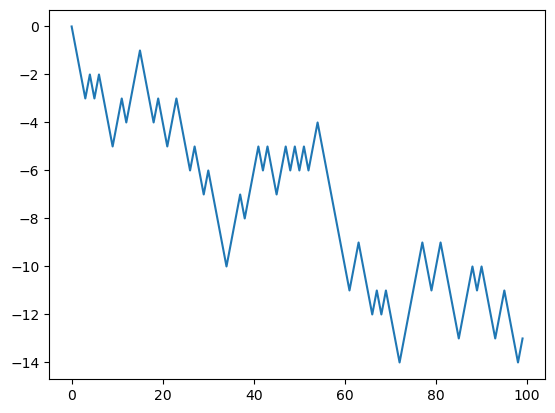

In [2]:
import matplotlib.pyplot as plt
plt.plot(walk[:100])    # 根据前100个随机漫步值生成的折线图

# 通过数组表达式来实现1000步的随机漫步

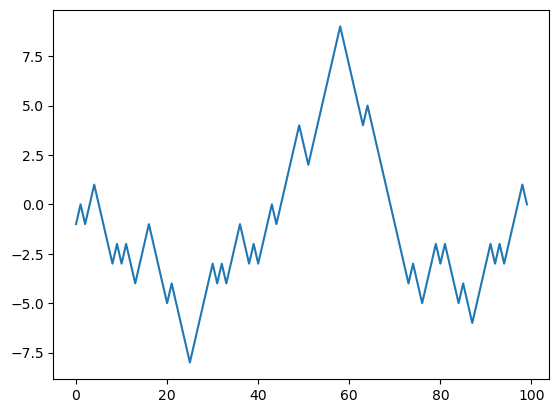

In [3]:
import numpy as np
nsteps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()
plt.plot(walk[:100])

## 统计数据，沿游走轨迹的最小值和最大值。

In [4]:
walk.min()

np.int64(-8)

In [5]:
walk.max()

np.int64(50)

# 随机漫步过程中第一次到达某个特定值的时间
`numpy.abs(walk)>=10`可以得到一个布尔型数组，它表示距离是否达到或超过10，而我们想要知道第一个10或-10的索引。可以用`argmax`来解决这个问题，它返回的是该布尔型数组最大值的第一个索引（True就是最大值）

In [6]:
(np.abs(walk) >= 10).argmax()

np.int64(155)

## 一次模拟多个随机漫步
模拟许多随机游走（比如 5000 次），则只需对前面的代码进行少量修改即可生成所有随机游走。如果传递一个 2 元组，这些函数将生成一个二维的绘制数组，我们可以计算每行的累积总和，以一次性计算所有五千次随机游走。

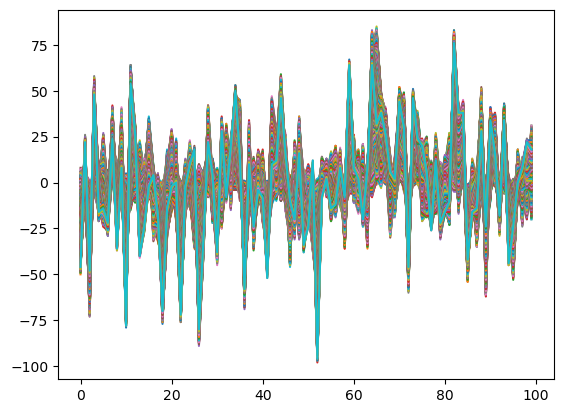

In [7]:
nwalks = 5000
nsteps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
plt.plot(walks[:100])

# 计算在所有游走中获得的最大值和最小值

In [8]:
walks.max()

np.int64(114)

In [9]:
walks.min()

np.int64(-120)

# 对于所有漫步，来计算达到30或-30的最小穿越时间。可以用any方法来对此进行检查。

In [10]:
hits30 = (np.abs(walks) >= 30).any(axis=1)

In [11]:
hits30

array([ True, False,  True, ...,  True,  True, False])

In [12]:
hits30.sum()

np.int64(3395)

# 利用这个布尔型数组选出那些达到了绝对值为30的随机漫步的行，并调用argmax在轴1上获取穿越时间

In [13]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)

In [14]:
crossing_times

array([705, 201, 491, ..., 149, 219, 259])

# 计算平均最短穿越时间

In [15]:
crossing_times.mean()

np.float64(500.6182621502209)

# 使用其它分布方式得到漫步数据。只需使用不同的随机数生成器方法即可，比如，standard_normal可以生成带有均值和标准差的正态分布数据。

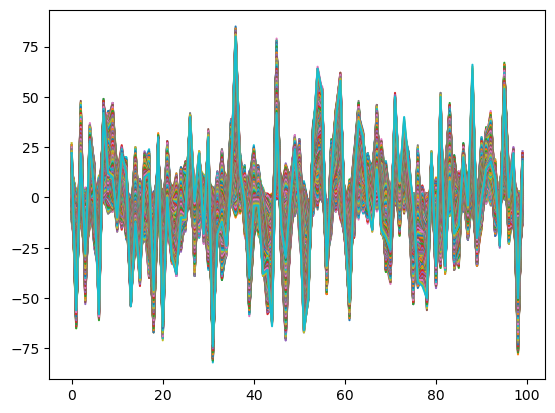

In [16]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))

steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
plt.plot(walks[:100])

In [17]:
walks.mean()

np.float64(-0.2041668)

In [18]:
np.mean(walks)

np.float64(-0.2041668)

In [19]:
walks.var()

np.float64(500.76630391777763)